# Markowitz

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Asume que tenemos 4 acciones (assets), cada una con una serie de retorno (return) de longitud de 1000. 

Podemos utilizar numpy.random.randn como muestra de retorno de una distribucion normal.

In [2]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

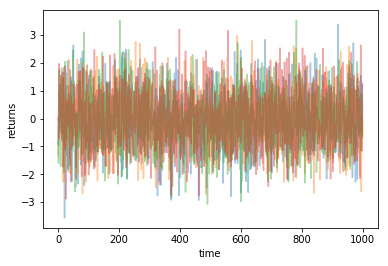

In [4]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns');

Estas series de retorno pueden ser usadas para crear un amplio rango de portafolios, cual todos tienen diferentes retornos y riesgos (desviacion estandar). 

Podemos producir un amplio rango de vectores de pesos aleatorios y graficar esos portafolios.

Queremos  que todo nuestro capital este invertido, este vector debe sumar 1.

In [5]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)


print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.29889484  0.2541214   0.18900052  0.25798324]
[ 0.21954229  0.39444212  0.11827545  0.26774014]


## Tamaño de las acciones

In [7]:
return_vec.shape 

(4, 1000)

## Media de cada accion 

In [10]:
np.mean(return_vec, axis=1)

array([-0.02186116,  0.01816169, -0.04430973,  0.01842434])

In [13]:
p = np.asmatrix(np.mean(return_vec, axis=1))
p

matrix([[-0.02186116,  0.01816169, -0.04430973,  0.01842434]])

## Generamos un portafolio aleatorio

Generamos un vector de peso w que refleja el porcentaje de inversion en cada accion. 

In [15]:
rand_weights(return_vec.shape[0])

array([ 0.55859731,  0.23999295,  0.13119679,  0.07021296])

In [17]:
w = np.asmatrix(rand_weights(return_vec.shape[0]))
w

matrix([[ 0.25686603,  0.44464984,  0.09437117,  0.20411296]])

## Calculamos la covarianza

In [18]:
np.cov(return_vec)

array([[ 0.99465901,  0.02047533,  0.04822092, -0.00289281],
       [ 0.02047533,  0.97179101,  0.01531229, -0.00469765],
       [ 0.04822092,  0.01531229,  0.94910354, -0.05641495],
       [-0.00289281, -0.00469765, -0.05641495,  1.02230623]])

In [19]:
np.cov(return_vec).shape

(4, 4)

In [20]:
C = np.asmatrix(np.cov(return_vec))
C

matrix([[ 0.99465901,  0.02047533,  0.04822092, -0.00289281],
        [ 0.02047533,  0.97179101,  0.01531229, -0.00469765],
        [ 0.04822092,  0.01531229,  0.94910354, -0.05641495],
        [-0.00289281, -0.00469765, -0.05641495,  1.02230623]])

# El calculo del retorno con:

$$R = p^Tw$$

- $R$ es el retorno experado
- $P^T$ es la transpuesta del vector para la media de retornos
- $w$ es el vector de pesos del portafolio

- $p$ es un vector columan $Nx1$ 
- $p^T$ es un vector fila $1xN$
- $w$ es un vector columna $Nx1$

# Despues calculamos el riesgo (volatilidad) con la desviacion estandar con:

$$\sigma = \sqrt{w^TCw} $$

- C es la matriz de covarianza de los retornos que es una matriz $NxN$

**Nota:** Si calculamos la desviacion estandar con los pesos apropiados usando `std(array(ret_vec).T*w )` tendremos una pequeña diferencia en la marca `bullet`.

> Esto se debe al calculo de la desviacion estandar que no toma encuenta la covarianza. 

>En la matriza de covarianza los valores de la diagonal representan la simple varianza de cada accion (asset) mientras que fuera de la diagonal es la varianza entre las acciones (assets)

Usando la ordinaria `std()` efectivamente seria solamente la diagonal y perderiamos el resto de informacion. Pequeña per significante diferencia.



In [29]:
np.random.seed(123)
p = np.asmatrix(np.mean(return_vec, axis=1))
w = np.asmatrix(rand_weights(return_vec.shape[0]))
C = np.asmatrix(np.cov(return_vec))
mu = w * p.T
sigma = np.sqrt(w * C * w.T)

mu,sigma

(matrix([[-0.00563557]]), matrix([[ 0.54745392]]))

In [32]:
# De otra manera 

In [31]:
np.random.seed(123)
p = np.mean(return_vec, axis=1)
w = rand_weights(return_vec.shape[0])
C = np.cov(return_vec)
mu = p.T@w
sigma = np.sqrt(w.T @ C @ w)

mu,sigma

(-0.0056355687894621203, 0.54745392388857039)

In [26]:
p.shape,w.shape,C.shape

((4,), (4,), (4, 4))

In [35]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

# Vamos a generar la media de retornos y la volatilidad para 500 portafolios aleatorios. 


In [40]:
n_portfolios = 3
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

In [41]:
means

array([[ 0.00616904],
       [-0.00816065],
       [-0.00928669]])

In [42]:
stds

array([[ 0.56734385],
       [ 0.50640045],
       [ 0.52162266]])

In [48]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

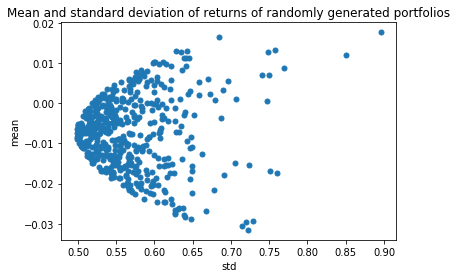

In [49]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios');


Una vez que tenemos la representacion de nuestros portafolios como los puntos en azules, podemos calcular la frontera de eficiencia Markowitz-style. Esto es hecho por minimizar 

$$w^T C w $$


para $w$ en los regresos experados de los portafolios $R^T$ manteniendo la suma de todos los pesos igual a 1:

$$\sum_{i}{w_i} = 1 $$

Parametricamente corremos atravez de $R^Tw=μ$ y encontramos la minima varianza para diferentes $μ‘s$. 

Esto puede hacerse con `scipy.optimise.minimize` pero nececitamos definir un problema bastante complejo con cotas, y restricciones y multiplicadores de Lagrange.

Convenientemente el paquete `cvxopt`,y un solver `convex` hace todo por nosotros.


El vector `mus` produce series de valores de retornos experados $\mu$ en una nolineal(non-linear) y más apropiada manera

Vermos despues que no se necesita calcular demasiados de esos y ellos se ajustan perfectamente a una parabola, cual pueden seguramente ser extramolados para valores mayores.

In [53]:
n = len(return_vec)
returns = np.asmatrix(return_vec)
N = 100

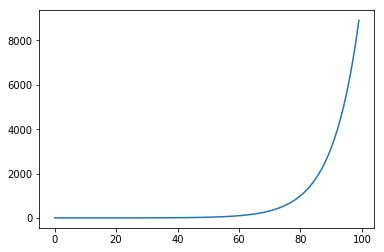

In [57]:
mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
plt.plot(mus)

In [61]:
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
# Turn off progress printing 
solvers.options['show_progress'] = False

In [73]:
np.cov(returns)

array([[ 0.99465901,  0.02047533,  0.04822092, -0.00289281],
       [ 0.02047533,  0.97179101,  0.01531229, -0.00469765],
       [ 0.04822092,  0.01531229,  0.94910354, -0.05641495],
       [-0.00289281, -0.00469765, -0.05641495,  1.02230623]])

In [74]:
np.mean(returns, axis=1)

matrix([[-0.02186116],
        [ 0.01816169],
        [-0.04430973],
        [ 0.01842434]])

In [62]:
# Convert to cvxopt matrices
S = opt.matrix(np.cov(returns))
pbar = opt.matrix(np.mean(returns, axis=1))


In [64]:
S,pbar

(<4x4 matrix, tc='d'>, <4x1 matrix, tc='d'>)

In [67]:
# Create constraint matrices
G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
h = opt.matrix(0.0, (n ,1))
A = opt.matrix(1.0, (1, n))
b = opt.matrix(1.0)
    

In [69]:
G,h,A,b

(<4x4 matrix, tc='d'>,
 <4x1 matrix, tc='d'>,
 <1x4 matrix, tc='d'>,
 <1x1 matrix, tc='d'>)

## mu rendimiento
`p = np.mean(return_vec, axis=1)
w = rand_weights(return_vec.shape[0])
C = np.cov(return_vec)
mu = p.T@w
sigma = np.sqrt(w.T @ C @ w)`

## Convert to cvxopt matrices
`
S = opt.matrix(np.cov(returns))
pbar = opt.matrix(np.mean(returns, axis=1))
`

p.T@w C

pbar == p
S == C

In [75]:
# Calculate efficient frontier weights using quadratic programming
portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]

In [81]:
## CALCULATE RISKS AND RETURNS FOR FRONTIER
returns = [blas.dot(pbar, x) for x in portfolios]
risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]

In [82]:
## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
m1 = np.polyfit(returns, risks, 2)
x1 = np.sqrt(m1[2] / m1[0])

In [83]:
# CALCULATE THE OPTIMAL PORTFOLIO
wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

In [85]:
#np.asarray(wt), returns, risks

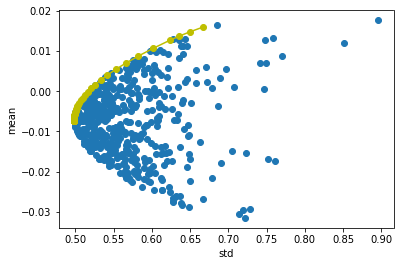

In [86]:
fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [88]:
weights = np.asarray(wt)
print (weights)

[[  4.07349921e-07]
 [  5.09503087e-01]
 [  6.77453596e-08]
 [  4.90496438e-01]]


if you knew the mean and variance,
you could guess the expected utility quite well.


What Levy and I did was to do that same experiment using historical returns on investment companies and a variety of utility functions. We confirmed that if your probability distribution is not too spread out,
and the annual returns on investment companies turn out to be not too spread out, then if you know mean and variance, you can guess expected utility quite well.

mean-variance analysis.

So, I'm a Bayesian, and I am not worried about Mandelbrot's stable Paretian distributions. For daily returns, Student's t-distribution with four-and-a-half degrees of freedom, plus or minus a half degree, is a good
model of stock returns. When you aggregate them up to lower frequencies, things start looking normal. So, I go back to the Levy-Markowitz paper: As long as your probability distributions aren't too spread out,
mean variance is a good approximation to the expected utility.

The beauty of the scenario approach is that it's completely agnostic. Suppose I'm trying to analyze the outcomes of the roll of a die. If you study the physics, you'll say that you can have any of the
faces show up with equal probability. But instead of that, you roll the die a thousand times and store those thousand die rolls. Those would be scenarios

“agnóstico” significa esencialmente “sin conocimiento”

Now, let's do an example that you couldn't easily solve with theory. Suppose I had two dice that were statistically related by having magnets imbedded in them. I could roll the dice together and the number that
appeared on one die would, in fact, have implications for the number on the other die. I could store these numbers in two columns of thousands of rows in Excel. The scenarios in the two columns capture the
joint distribution of the dice.

we've developed a technology which takes thousands of scenarios and packs them into a single data element. I call this the Distribution String, or the DIST for short.

What is still true in 2010, as true as it was in 1959, is the table on Page 121 of my book showing that if probability distributions are not too spread out, then mean-variance approximation will work very well.

Yes, you have a tool kit full of techniques--optimization, Monte Carlo, present value, linear programming, quadratic programming, and so on. A person who only has one tool in his kit is a danger.
You know the old saying, "If all you have is a hammer, everything looks like a nail."

under certain conditions, mean-variance works perfectly well. What are those conditions? Well, they have
to do with the probability distribution returns not being spread out too much, like Levy-Markowitz says.